# Theory

Alright! Imagine you have a magical copying machine. You give it a big, detailed picture, and it tries to make a tiny version of it, keeping only the most important details. Later, it uses that tiny version to recreate the original picture as best as it can.

This is what an autoencoder does!

🔹 Encoder → Shrinks the information (like making a tiny version of the picture).
🔹 Bottleneck → The super small, important version of the data.
🔹 Decoder → Tries to rebuild the original from the tiny version.

It’s useful for:
✅ Removing noise from pictures.
✅ Compressing data (making files smaller).
✅ Finding patterns in data.

It learns by making mistakes—each time it tries to rebuild, it gets a little better! 🎯







You said:
use cases
ChatGPT said:
Autoencoders are super useful! Here are some real-world use cases:

🔍 1. Image Denoising
🚀 Cleans up blurry or noisy pictures (like removing grainy dots from old photos).
📸 Example: Enhancing low-light or old images.

🎭 2. Anomaly Detection
🚨 Finds unusual patterns that don’t fit the normal data.
🔎 Example: Detecting fraud in credit card transactions or catching defects in factory machines.

🗜️ 3. Data Compression
📦 Shrinks data while keeping important details (like making a file smaller without losing quality).
🎵 Example: Compressing music or videos to take up less space.

🧠 4. Feature Learning
🧐 Helps AI understand complex data by learning key features automatically.
🤖 Example: Pre-training deep learning models for better accuracy.

🎨 5. Image Generation
🖼️ Creates new images from learned patterns (like making fake human faces).
🎭 Example: AI-generated art or face-swapping apps.

Autoencoders are like smart filters that learn to focus on what really matters! 🚀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300, n_features=2,centers=2, cluster_std=1.0, random_state=101)

In [6]:
X

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645],
       [-10.81648852,  -5.82372891],
       [  0.96977807,   0.50825184],
       [-10.29728144,  -7.21832357],
       [  0.04271579,   3.50389089],
       [  0.15391601,   2.19349145],
       [ -9.81008003,  -5.35480445],
       [-11.18334003,  -6.7004804 ],
       [  0.51876688,   3.39210906],
       [ -8.09111654,  -6.92631627],
       [  1.1112886 ,   0.704398  ],
       [ -7.49469451,  -7.06186612],
       [ -0.75249891,   2.31574949],
       [  0.72046137,   1.63484242],
       [ -0.80867204,   1.41371822],
       [  1.13010192,  -0.25418504],
       [-10.6252148 ,  -6.71479817],
       [ -0.06311641,   3.15682868],
       [  0.56609951,   3.41000402],
       [ -9.10474956,  -7.83047821],
       [-11.33926304,  -7.83622233],
       [  0.29639341,   2.06317757],
       [ -0.52722349,   2.95534215],
 

In [7]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [10]:
# random noise 
np.random.seed(seed=101)
z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)

In [11]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [12]:
feat = pd.DataFrame(X)

In [13]:
feat

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [16]:
feat = pd.concat([feat, z_noise], axis = 1)

In [17]:
feat.columns= ['X1','X2','X3']

In [18]:
feat

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


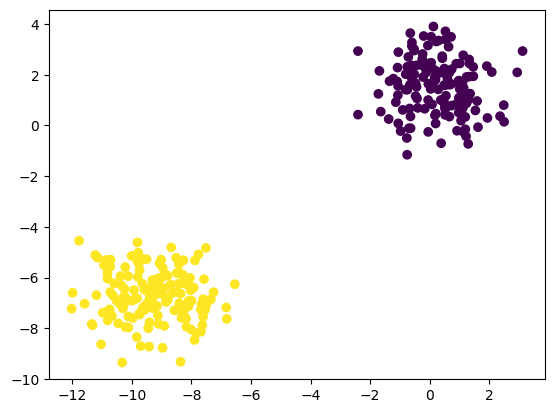

In [21]:
plt.scatter(feat.X1, feat.X2, c = y);

In [22]:
from mpl_toolkits.mplot3d import Axes3D

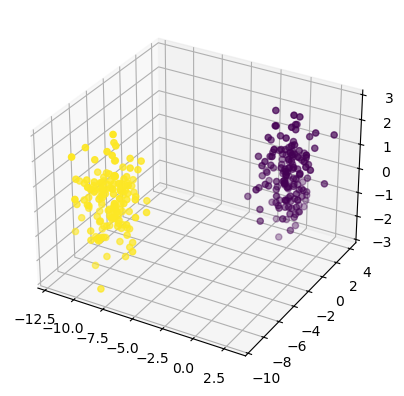

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat.X1, feat.X2, feat.X3, c=y)
plt.show();



In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
from tensorflow.keras.optimizers import SGD

In [39]:
# 3 -- 2 -- 3

In [40]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu', input_shape=[3]))


C:\Users\theed\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu', input_shape=[2]))

In [42]:
autoencoder = Sequential([encoder, decoder])


In [43]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
scaled_data = scaler.fit_transform(feat)

In [47]:
autoencoder.fit(scaled_data,scaled_data, epochs=5)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2450  
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2657 
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2434 
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2238 
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2300 


In [48]:
encoder_2dim = encoder.predict(scaled_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [49]:
encoder_2dim

array([[4.38466668e-02, 1.48684531e-01],
       [9.43223059e-01, 0.00000000e+00],
       [8.78753483e-01, 0.00000000e+00],
       [0.00000000e+00, 2.18576062e-02],
       [0.00000000e+00, 9.89973843e-02],
       [0.00000000e+00, 0.00000000e+00],
       [8.34796011e-01, 0.00000000e+00],
       [0.00000000e+00, 6.83621690e-02],
       [7.52703488e-01, 0.00000000e+00],
       [8.89809072e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [9.14955080e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [8.46164167e-01, 0.00000000e+00],
       [5.68757057e-02, 0.00000000e+00],
       [7.84283936e-01, 0.00000000e+00],
       [9.96003926e-01, 0.00000000e+00],
       [8.96386683e-01, 0.00000000e+00],
       [9.18594658e-01, 0.00000000e+00],
       [0.00000000e+00, 3.91928777e-02],
       [9.45064962e-01, 0.00000000e+00],
       [8.12861502e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

In [50]:
encoder_2dim.shape

(300, 2)

In [51]:
scaled_data.shape

(300, 3)

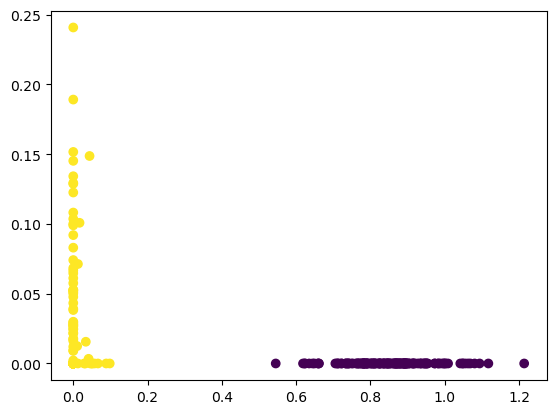

In [56]:
plt.scatter(encoder_2dim[:,0], encoder_2dim[:,1], c=y)
plt.show();